# Classifier metrics with paper parameters

In [1]:
from parameters import Parameters, ClassificationParameters, CardSimParameters, PPOParameters

USE_ANOMALY = True
params = Parameters(
    agent=PPOParameters.best_ppo(USE_ANOMALY),
    cardsim=CardSimParameters.paper_params(),
    clf_params=ClassificationParameters.paper_params(USE_ANOMALY),
)


In [ ]:
banksys = params.create_banksys(use_cache=False, fit=True)

Sourcing DCPC data


In [10]:
import polars as pl
from datetime import timedelta

end_time = banksys.current_time + timedelta(days=100)
transactions = banksys._transactions_df.filter(pl.col("timestamp").is_between(banksys.current_time, end_time))
test_y = transactions["is_fraud"]
dfs = banksys.simulate_until(end_time)
test_x = pl.concat(dfs)
test_x.describe()

statistic,hour,is_online,amount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,card_n_trx_last_1:00:00,card_mean_amount_last_1:00:00,"card_n_trx_last_1 day, 0:00:00","card_mean_amount_last_1 day, 0:00:00","card_n_trx_last_7 days, 0:00:00","card_mean_amount_last_7 days, 0:00:00","card_n_trx_last_30 days, 0:00:00","card_mean_amount_last_30 days, 0:00:00",terminal_n_trx_last_1:00:00,terminal_risk_last_1:00:00,"terminal_n_trx_last_1 day, 0:00:00","terminal_risk_last_1 day, 0:00:00","terminal_n_trx_last_7 days, 0:00:00","terminal_risk_last_7 days, 0:00:00","terminal_n_trx_last_30 days, 0:00:00","terminal_risk_last_30 days, 0:00:00"
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6,1.73077e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",12.200295,0.360694,21.053832,0.139998,0.139989,0.139827,0.140358,0.149912,0.149496,0.140419,0.069077,1.381482,0.904937,12.38741,6.327641,20.969711,27.119405,21.060381,0.691622,0.002277,9.046194,0.010038,63.320757,0.010312,271.453312,0.011457
"""std""",4.877867,0.480202,28.927113,0.346985,0.346975,0.346808,0.347359,0.356986,0.356577,0.347421,0.266026,8.922772,0.97064,22.574806,2.856571,15.698303,7.777962,11.090327,0.924286,0.044324,3.493344,0.038703,14.774711,0.014335,55.945448,0.008339
"""min""",0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.840769,0.0,0.0,0.0,0.0,15.0,0.0,104.0,0.0
"""25%""",8.0,0.0,6.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.124167,22.0,13.206905,0.0,0.0,7.0,0.0,52.0,0.0,228.0,0.004975
"""50%""",12.0,0.0,12.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.15,6.0,16.895,26.0,18.273333,0.0,0.0,9.0,0.0,64.0,0.0,274.0,0.01005
"""75%""",17.0,1.0,24.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.17,8.0,26.05,32.0,25.989048,1.0,0.0,11.0,0.0,74.0,0.017544,318.0,0.016484
"""max""",23.0,1.0,1985.65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1261.41,9.0,1985.65,29.0,714.655,86.0,227.14875,9.0,1.0,31.0,1.0,130.0,0.148148,415.0,0.059113


F1 Score: 0.1590173786335833
Recall: 0.5602088167053364
Precision: 0.09265957344743886
Accuracy: 0.9409771373434945
Confusion Matrix:
[[1618957   94573]
 [   7582    9658]]


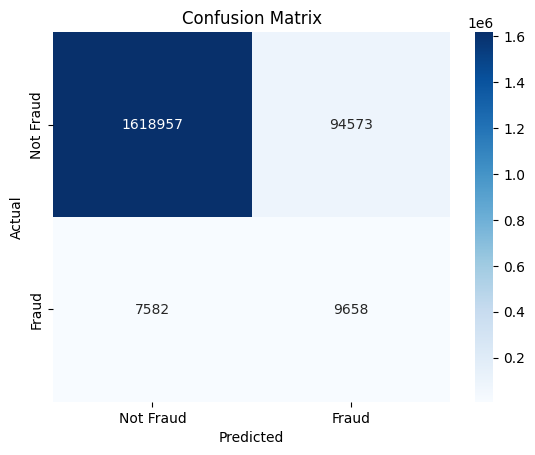

In [11]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predicted = banksys.clf.predict(test_x) #  classifier.current_time)

f1 = f1_score(test_y, predicted)
recall = recall_score(test_y, predicted)
precision = precision_score(test_y, predicted)
accuracy = accuracy_score(test_y, predicted)
confusion = confusion_matrix(test_y, predicted)
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()